Testing Audio recorded from Teensy Board

In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import scipy as sp
import random #for white noise
"""Values Taken from the SPH0645 Microphone"""
val = np.loadtxt("AudioTest.txt", comments = "#", delimiter = ", ", unpack = False)
print(val)

[[ 0.00000e+00 -1.75100e+03]
 [ 1.00000e+00 -1.74000e+03]
 [ 2.00000e+00 -1.74000e+03]
 ...
 [ 1.76397e+05 -1.83200e+03]
 [ 1.76398e+05 -1.85300e+03]
 [ 1.76399e+05 -1.84200e+03]]


-1809.2674716553288


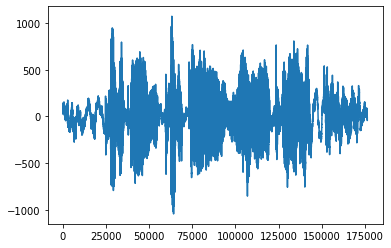

In [2]:
#Isolate Sample Values
samples = np.zeros(len(val))
for i in range(len(val)):
    samples[i] = val[i][1]
#subtract DC component
print(np.average(samples))
samples = samples - np.average(samples)
#Plot of Samples
plt.plot(samples)
#Hear playback
ipd.Audio(samples, rate = 44100)

In [3]:
remezlpf = signal.remez(301, [0, 300, 400, 22050], [1, 0], fs = 44100) #LPF using remez exchange
remezhpf = signal.remez(301, [0, 300, 400, 22050], [0, 1], fs = 44100) #HPF using remez exchange
remezvlf = signal.remez(301, [0, 100, 200, 22050], [1, 0], fs = 44100) #Very LPF using remez exchange
noise = np.random.normal(loc = 0.5, scale = 0.5, size = 5*10**7)
"""Generate Bass Boosted Bad Audio for the memes"""
#Intended for fs = 44.1kHz, CD quality audio
def fullDestruction(samples): 
    #Find the low frequency and high frequency parts of the signal
    lf = sp.signal.convolve(samples, remezlpf, mode = 'same')
    hf = sp.signal.convolve(samples, remezhpf, mode = 'same')
    #Extra Bass noise
    bass = sp.signal.convolve(noise[0:len(samples)], remezvlf, mode = 'same')
    #Destroy the "bass" parts of the signals by lowering resolution and boost the volume
    maxLow = np.max(lf) #max value of low frequency parts
    lf = 5*np.ndarray.astype(lf/maxLow * 5, np.int) * int(maxLow/6) #six quantized values
    #Less bad destruction of non "bass" parts
    maxHigh = np.max(hf) #max value of higher freq parts
    hf = np.ndarray.astype(hf/maxHigh * 10, np.int) * int(maxHigh/6) #six quantized values
    finalsignal = lf + hf
    bass = 0.1*(np.ndarray.astype(bass*4, np.int) * int(np.max(finalsignal)/5))
    return finalsignal+bass

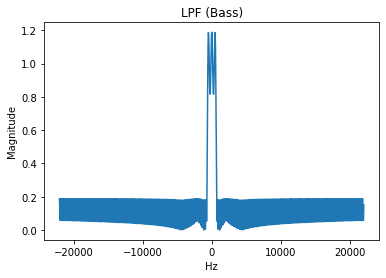

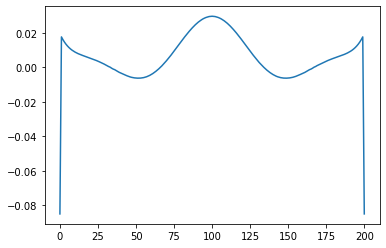

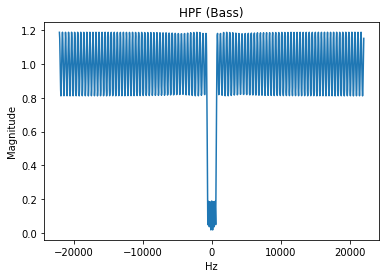

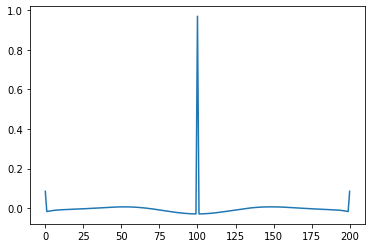

In [4]:
"""Visualizing Remez LPF"""
lpf = sp.signal.remez(201, [0, 600, 700, 22050], [1,0], fs = 44100) #LPF using remez exchange
lpffft = np.fft.fftshift(np.fft.fft(lpf, n=1000))
lpffreq = 44100*np.fft.fftshift(np.fft.fftfreq(1000))
plt.plot(lpffreq, np.abs(lpffft))
plt.title("LPF (Bass)")
plt.xlabel("Hz")
plt.ylabel("Magnitude")
plt.show()

plt.plot(lpf)
plt.show()

"""Visualizing Remez HPF"""
hpf = sp.signal.remez(201, [0, 600, 700, 22050], [0,1], fs = 44100) #LPF using remez exchange
hpffft = np.fft.fftshift(np.fft.fft(hpf, n=1000))
hpffreq = 44100*np.fft.fftshift(np.fft.fftfreq(1000))
plt.plot(hpffreq, np.abs(hpffft))
plt.title("HPF (Bass)")
plt.xlabel("Hz")
plt.ylabel("Magnitude")
plt.show()

plt.plot(hpf)
plt.show()

In [5]:
#Destroying Audio
desSamples = fullDestruction(samples)
ipd.Audio(desSamples, rate = 44100)

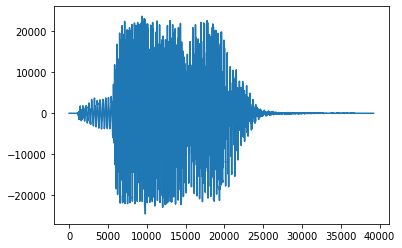

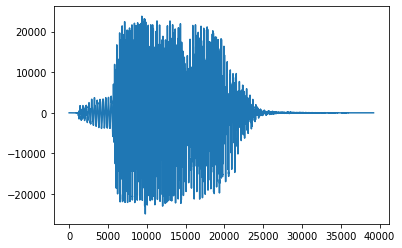

In [13]:
fs, data = wavfile.read('R1.WAV')
ch0 = np.ndarray.astype(data[:,0], np.float) # left channel only
ch1 = np.ndarray.astype(data[:,1], np.float) # right channel only
plt.plot(ch0)
plt.show();
plt.plot(ch1)
plt.show();

In [14]:
ipd.Audio(ch0, rate = 44100)

In [15]:
ipd.Audio(ch1, rate = 44100)

In [17]:
ipd.Audio(np.ndarray.astype(data, np.float), rate = 44100)

error: ushort format requires 0 <= number <= 0xffff